In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# 📌 Step 2: Load Dataset
df = pd.read_csv("data/sales_data_sample.csv", encoding='latin1')  # fix encoding issues if needed
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [3]:
# 📌 Step 3: Preprocess Data
# Convert order date to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract date features
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Day'] = df['ORDERDATE'].dt.day
df['Weekday'] = df['ORDERDATE'].dt.day_name()

# Basic cleanup
df['SALES'] = pd.to_numeric(df['SALES'], errors='coerce')
df.dropna(subset=['SALES'], inplace=True)
df = df[df['SALES'] > 0]
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month,Day,Weekday
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,2003,2,24,Monday
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2003,5,7,Wednesday
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,7,1,Tuesday
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,2003,8,25,Monday
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,NaN,Brown,Julie,Medium,2003,10,10,Friday


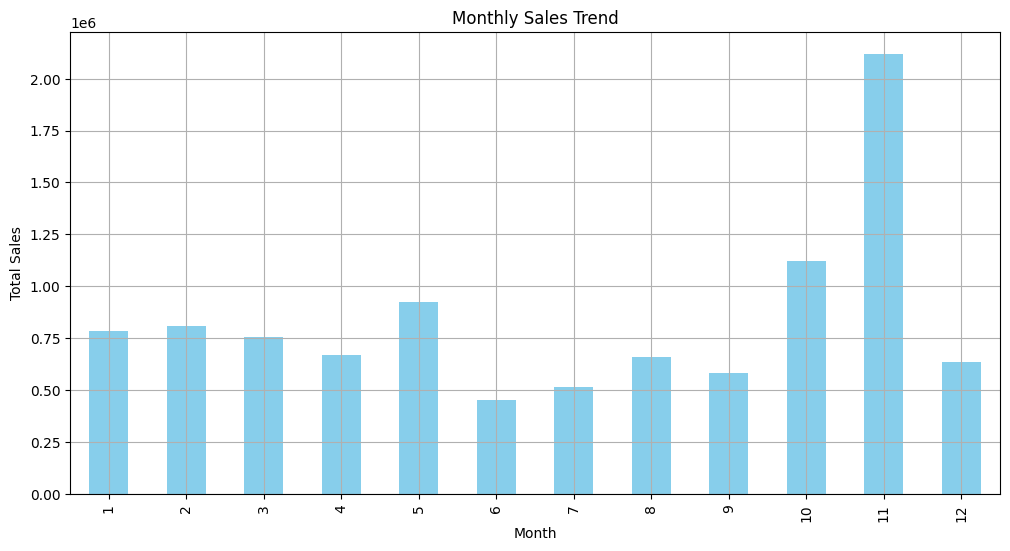

In [4]:
# 📊 Step 4: Descriptive Analysis
plt.figure(figsize=(12, 6))
df.groupby('Month')['SALES'].sum().plot(kind='bar', color='skyblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


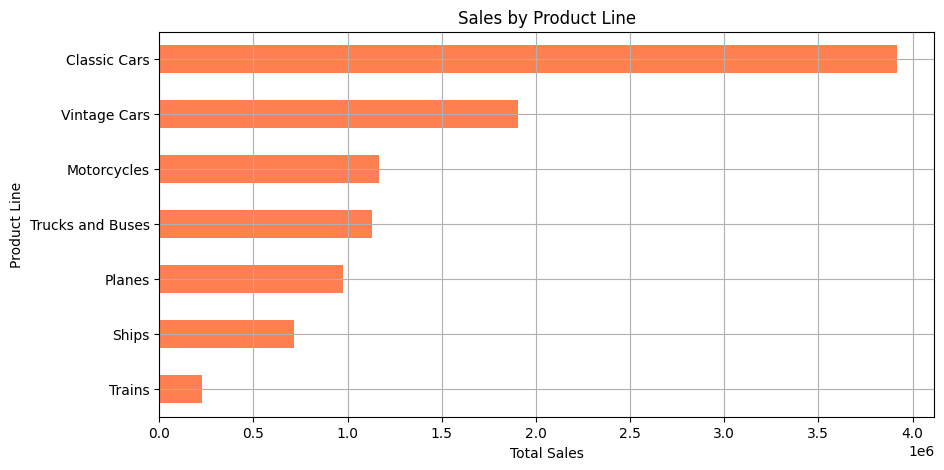

In [5]:
# Product Line Sales
plt.figure(figsize=(10, 5))
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values().plot(kind='barh', color='coral')
plt.title("Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.grid(True)
plt.show()


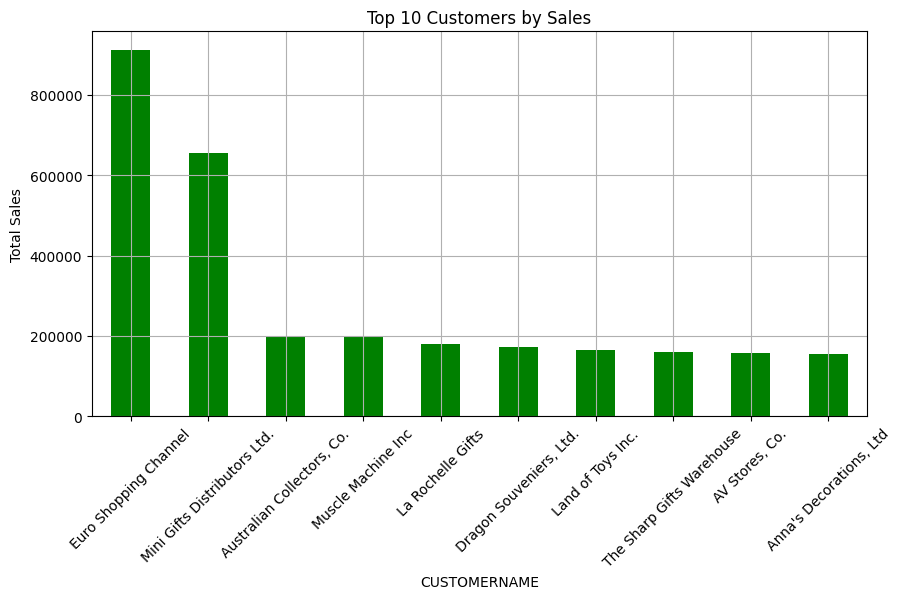

In [6]:
# Top Customers
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='green')
plt.title("Top 10 Customers by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


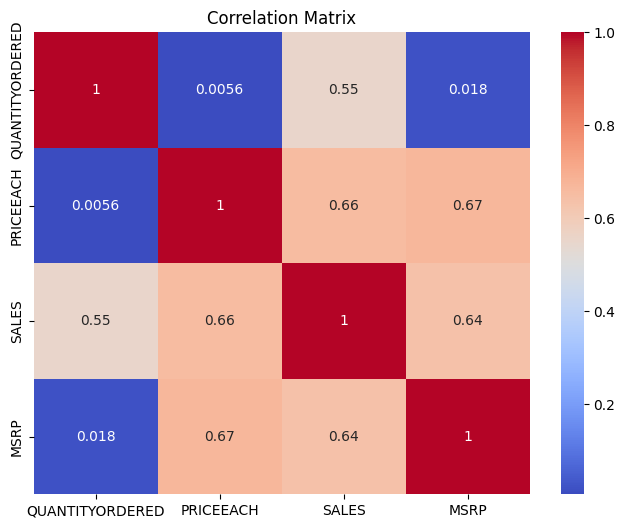

In [7]:
# 📈 Step 5: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
# 🔮 Step 6: Predictive Model – Predict SALES
features = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
target = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.7605331377928033
MAE: 653.0680867292309


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode PRODUCTLINE and COUNTRY
le_product = LabelEncoder()
le_country = LabelEncoder()

df['PRODUCTLINE_ENC'] = le_product.fit_transform(df['PRODUCTLINE'])
df['COUNTRY_ENC'] = le_country.fit_transform(df['COUNTRY'])

# Save encoders for dashboard
joblib.dump(le_product, 'model/le_product.pkl')
joblib.dump(le_country, 'model/le_country.pkl')

# Feature engineering
df['DISCOUNT'] = df['MSRP'] - df['PRICEEACH']
df['UNIT_PROFIT'] = df['PRICEEACH'] - df['MSRP'] * 0.5
df['IS_BIG_ORDER'] = df['QUANTITYORDERED'].apply(lambda x: 1 if x > 30 else 0)

# Final features
features = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DISCOUNT', 'UNIT_PROFIT',
               'IS_BIG_ORDER', 'COUNTRY_ENC', 'PRODUCTLINE_ENC']]
target = df['SALES']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.8812940777650529
MAE: 319.1652275351873


In [10]:
# Save new model
joblib.dump(model, "model/sales_model.pkl")

['model/sales_model.pkl']